In [48]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Cleaning</h1>

In [49]:
# https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset
df = pd.read_csv("data.csv")

In [50]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [51]:
print(f"rows: {df.shape[0]}")
print(f"columns: {df.shape[1]}")

rows: 3900
columns: 18


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [53]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [54]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


<h2>Missing Value</h2>

In [55]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

<h1>Preprocessing</h1>

In [56]:
df = df.drop(["Customer ID"], axis=1)

In [57]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [58]:
categorical_cols

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [59]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Columns: 130 entries, Age to Frequency of Purchases_Weekly
dtypes: bool(126), float64(1), int64(3)
memory usage: 601.9 KB


In [61]:
boolean_columns = df.select_dtypes(include='bool').columns

for col in boolean_columns:
    df[col] = df[col].astype(int)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df) 

<h1>Models</h1>

<h2>K Means</h2>

In [63]:
def k_means(k, visualize=False):
    model_kmeans = KMeans(n_clusters=k, random_state=42)
    labels = model_kmeans.fit_predict(df_scaled)
    
    if visualize:
        pca = PCA(n_components=2)
        pca_components = pca.fit_transform(df_scaled)
        
        plt.figure(figsize=(8,6))
        plt.scatter(pca_components[:, 0], pca_components[:, 1],
                    c=labels)
        plt.xlabel("PCA 1")
        plt.ylabel("PCA 2")
        plt.show()

    return labels

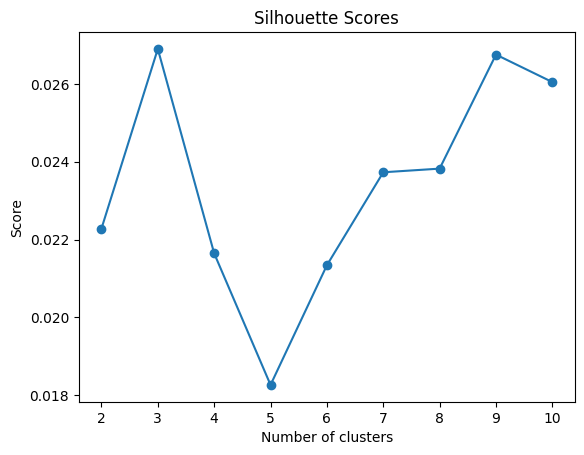

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

k_arr = list(range(2, 11))
silhouette_scores = []

for k in k_arr:
    labels = k_means(k)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

plt.plot(k_arr, silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters")
plt.ylabel("Score")
plt.show()

In [65]:
k_optimal = k_arr[np.argmax(silhouette_scores)]

In [66]:
k_optimal

3

In [67]:
labels = k_means(k_optimal)

<h2>Visualization with PCA</h2>

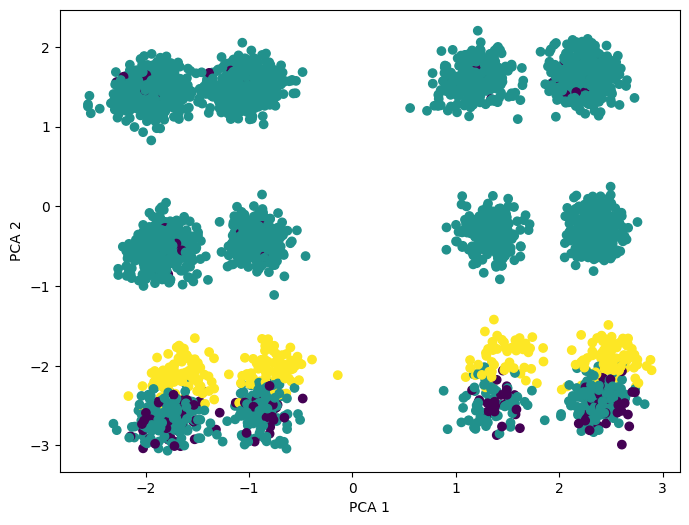

In [68]:
from sklearn.decomposition import PCA

_ = k_means(k_optimal, visualize=True)

<h2>Interpretation</h2>

In [69]:
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels = kmeans.fit_predict(df_scaled)

In [70]:
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profiles = pd.DataFrame(cluster_centers_original, columns=df.columns)
display(cluster_profiles)

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,...,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,44.123810,63.714286,3.815714,26.538095,0.633333,9.523810e-03,1.428571e-02,6.857143e-01,-1.387779e-17,2.380952e-02,...,0.190476,0.166667,0.166667,0.166667,0.157143,0.161905,0.147619,0.090476,0.180952,0.166667
1,44.041592,59.767380,3.746138,25.315508,0.682115,4.723708e-02,4.991087e-02,4.857226e-17,-2.636780e-16,4.783125e-02,...,0.171420,0.163993,0.172906,0.161616,0.140820,0.149436,0.136067,0.145573,0.140523,0.136364
2,44.311728,57.172840,3.746914,24.956790,0.688272,2.775558e-17,2.081668e-17,1.387779e-17,4.969136e-01,6.938894e-18,...,0.166667,0.151235,0.185185,0.169753,0.123457,0.145062,0.163580,0.135802,0.160494,0.138889


In [71]:
cluster_profiles

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,...,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,44.123810,63.714286,3.815714,26.538095,0.633333,9.523810e-03,1.428571e-02,6.857143e-01,-1.387779e-17,2.380952e-02,...,0.190476,0.166667,0.166667,0.166667,0.157143,0.161905,0.147619,0.090476,0.180952,0.166667
1,44.041592,59.767380,3.746138,25.315508,0.682115,4.723708e-02,4.991087e-02,4.857226e-17,-2.636780e-16,4.783125e-02,...,0.171420,0.163993,0.172906,0.161616,0.140820,0.149436,0.136067,0.145573,0.140523,0.136364
2,44.311728,57.172840,3.746914,24.956790,0.688272,2.775558e-17,2.081668e-17,1.387779e-17,4.969136e-01,6.938894e-18,...,0.166667,0.151235,0.185185,0.169753,0.123457,0.145062,0.163580,0.135802,0.160494,0.138889
